 # Compare old and new solutions visually, and evaluate roundtrip errors #

In [1]:
import miricoord.mrs.mrs_tools as mt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# All pixels
channel='1A'
ymin,ymax=0,1023#500,501
xmin,xmax=0,512#513,1031#0,512

In [3]:
# All pixels
xrow=np.mgrid[xmin:xmax]
yrow=np.mgrid[ymin:ymax]
xall=np.tile(xrow,(yrow.size,1))*1.
yall=np.tile(yrow,(xrow.size,1))*1.
yall=np.transpose(yall)
# Recast as 1d arrays
xall=xall.reshape(-1)
yall=yall.reshape(-1)

In [4]:
# Old distortion
mt.set_toolversion('flt3')

In [5]:
# Convert to alpha/beta
values_old=mt.xytoabl(xall,yall,channel,trim=1)
alpha_old=values_old['alpha']
beta_old=values_old['beta']
lam_old=values_old['lam']

In [6]:
v2_old,v3_old=mt.abtov2v3(alpha_old,beta_old,channel)

In [7]:
alpha2_old,beta2_old=mt.v2v3toab(v2_old,v3_old,channel)

In [8]:
values2_old=mt.abltoxy(alpha2_old,beta2_old,lam_old,channel)

In [9]:
# New distortion
mt.set_toolversion('flt4')

In [10]:
# Convert to alpha/beta
values_new=mt.xytoabl(xall,yall,channel,trim=1)
alpha_new=values_new['alpha']
beta_new=values_new['beta']
lam_new=values_new['lam']

In [11]:
v2_new,v3_new=mt.abtov2v3(alpha_new,beta_new,channel)

In [12]:
alpha2_new,beta2_new=mt.v2v3toab(v2_new,v3_new,channel)

In [13]:
values2_new=mt.abltoxy(alpha2_new,beta2_new,lam_new,channel)

In [14]:
#indx=100
#values_flt1['alpha'][indx],values_flt1['beta'][indx],values_flt1['lam'][indx],values_flt1['x'][indx],values_flt1['y'][indx]

In [15]:
#indx=100
#values2_flt1['alpha'][indx],values2_flt1['beta'][indx],values2_flt1['lam'][indx],values2_flt1['x'][indx],values2_flt1['y'][indx]

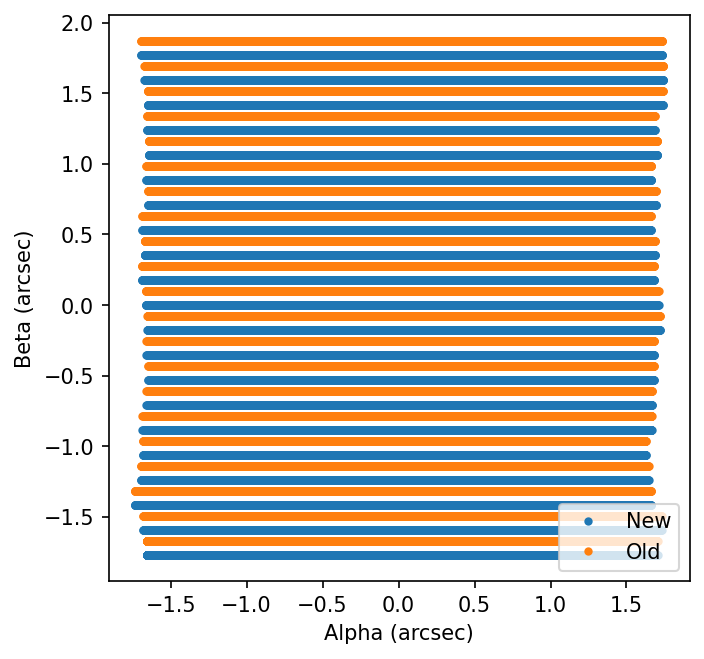

In [16]:
plt.figure(figsize=(5,5),dpi=150)
ax = plt.gca()
plt.plot(alpha_new,beta_new,'.',label='New')
plt.plot(alpha_old,beta_old+0.1,'.',label='Old')
plt.xlabel('Alpha (arcsec)')
plt.ylabel('Beta (arcsec)')
plt.legend()

In [17]:
print(np.mean(alpha_new),np.mean(alpha_old))

0.006527681811220591 0.006527681811220591


In [18]:
print(np.max(alpha_old),np.min(alpha_old))

1.7428427770455792 -1.7348990456119964


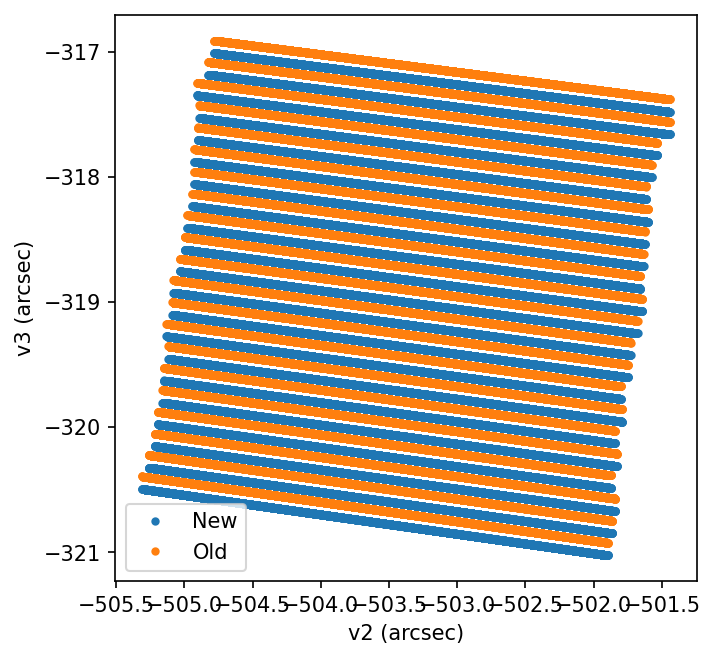

In [19]:
plt.figure(figsize=(5,5),dpi=150)
ax = plt.gca()
plt.plot(v2_new,v3_new,'.',label='New')
plt.plot(v2_old,v3_old+0.1,'.',label='Old')
plt.xlabel('v2 (arcsec)')
plt.ylabel('v3 (arcsec)')
plt.legend()
#plt.xlim(-505.5, -505.0)
#plt.ylim(-320.5,-320)

In [20]:
da=alpha_new-alpha2_new
db=beta_new-beta2_new

#indx=(np.where((values2['slicenum'] > 0) ))[0]
indx=(np.where((values2_new['x'] > -300) ))[0]


dx=values_new['x']-values2_new['x']
#dx=dx[indx]
dy=values_new['y']-values2_new['y']
#dy=dy[indx]

In [21]:
dy[100]

-0.023514024435917016

In [22]:
values_new['alpha'][100],values2_new['alpha'][100]

(0.18602540676083024, 0.1864406228372104)

In [23]:
values_new['beta'][100],values2_new['beta'][100]

(1.417681150376, 1.4187957445025177)

(array([30719., 38773., 39201., 39420., 39035., 38916., 39546., 39219.,
        39228., 30868.]),
 array([-1.73502871, -1.38724659, -1.03946447, -0.69168235, -0.34390023,
         0.00388189,  0.35166401,  0.69944613,  1.04722825,  1.39501036,
         1.74279248]),
 <BarContainer object of 10 artists>)

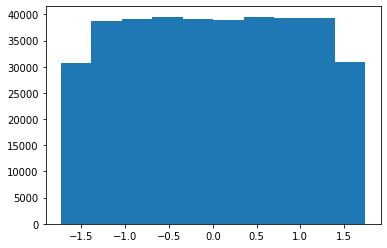

In [24]:
junk=values2_new['alpha'][indx]
plt.hist(junk)

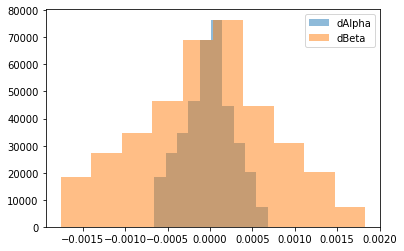

In [25]:
plt.hist(da,alpha=0.5,label='dAlpha')
plt.hist(db,alpha=0.5,label='dBeta')
plt.legend()

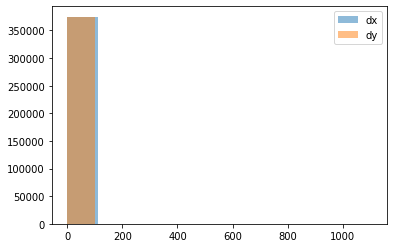

In [26]:
plt.hist(dx,alpha=0.5,label='dx')
plt.hist(dy,alpha=0.5,label='dy')
plt.legend()

In [27]:
indx=np.where(dx > 200)
values_new['x'][indx]

array([ 98.,  99., 100., 101., 102., 103., 104., 105.])

In [28]:
values2_new['x'][indx]

array([-999., -999., -999., -999., -999., -999., -999., -999.])

In [29]:
len(dx)

374933